# Plots spin textures and OAM densities for "Spin-Textured Neutron Beams with Orbital Angular Momentum"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.offsetbox import AnchoredText

plt.style.use(['science', 'notebook', 'grid', 'default', 'bright'])

SMALL_SIZE = 50
MEDIUM_SIZE = 60
BIGGER_SIZE = 70

plot_height = 15    #Plot size parameters
plot_width = plot_height*1.618

plt.rcParams['figure.figsize'] = (plot_width, plot_height)    #Default plot size

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#Additions to latex preamble for matplotlib:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsthm,amssymb,amsfonts,braket,siunitx}')
plt.rcParams["font.family"] = "Computer Modern Roman"

## Plot testing cell

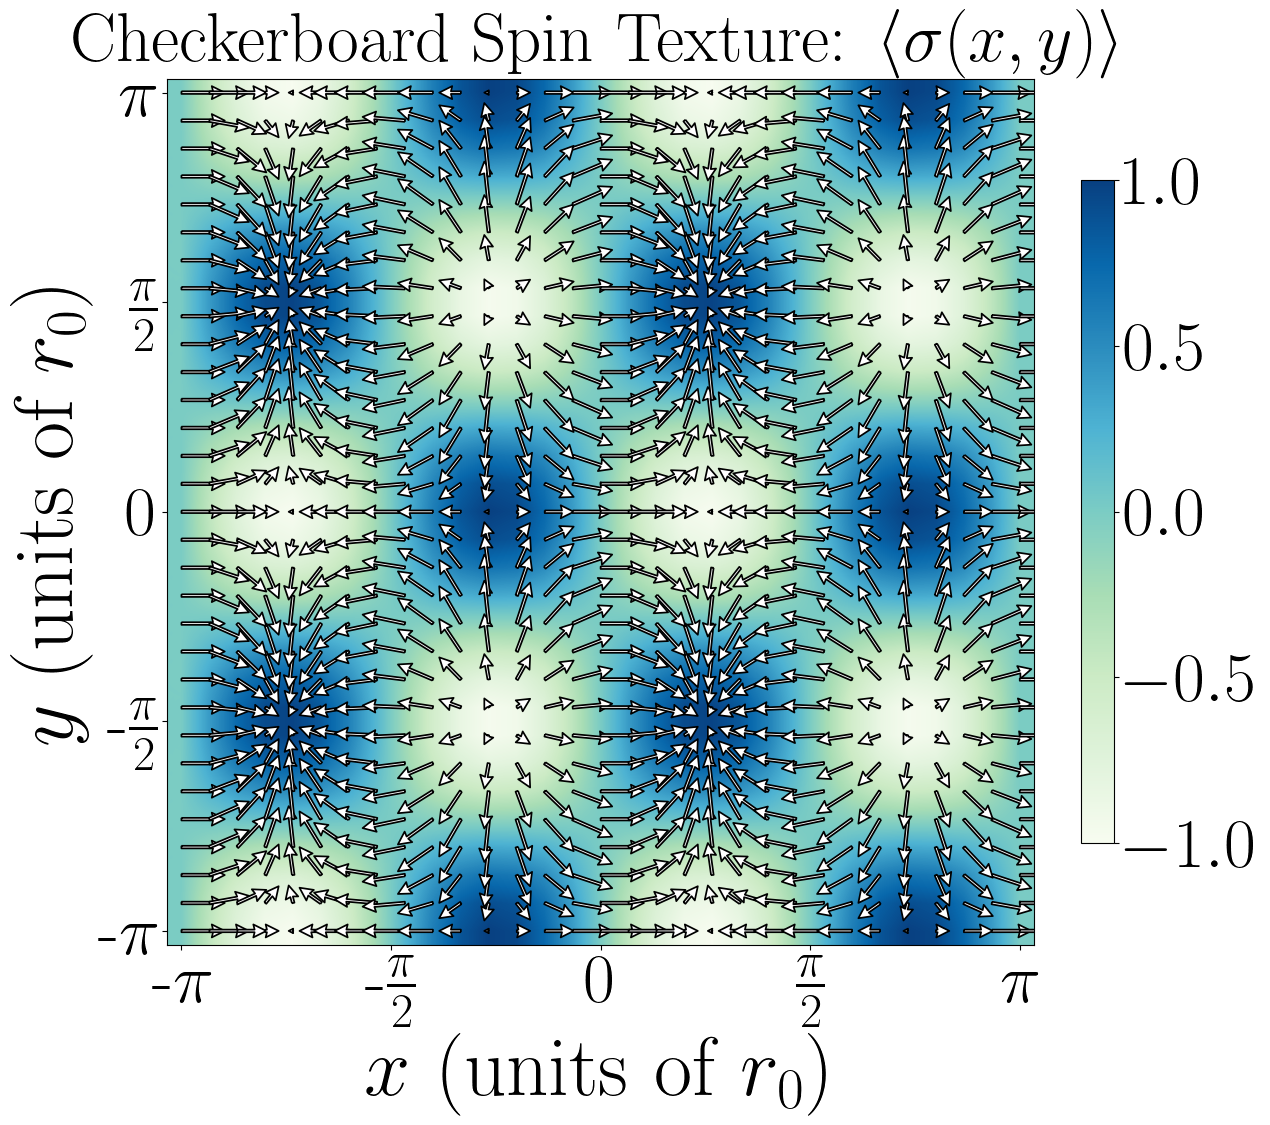

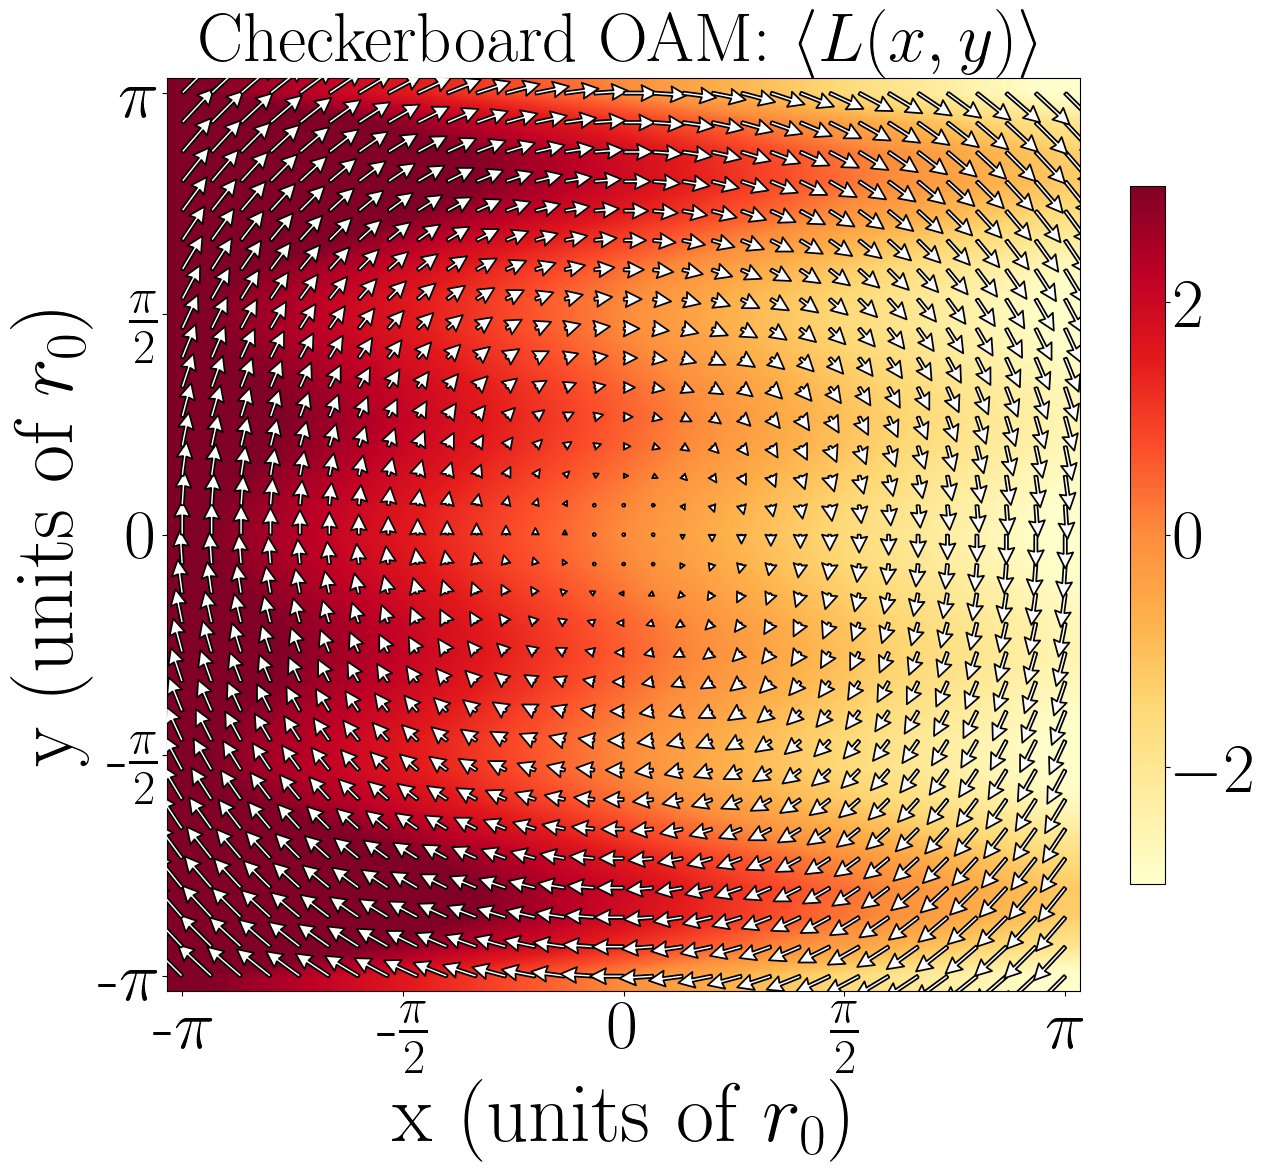

In [3]:
limit = np.pi
points = 31

axis = [round(i,1) for i in np.linspace(-limit,limit,points)]

X,Y = np.meshgrid(np.linspace(-limit,limit,points), np.linspace(-limit,limit,points))
QX, QY = np.meshgrid(np.arange(points), np.arange(points))

phi = 0
theta = np.pi/2

polx = np.cos(theta)*np.sin(2*X) + np.cos(2*X)*np.cos(phi)*np.sin(theta)
poly = -np.cos(2*X)*np.cos(theta)*np.sin(2*Y) + np.sin(theta)*(np.cos(phi)*np.sin(2*X)*np.sin(2*Y) + np.cos(2*Y)*np.sin(phi))
polz = np.cos(2*Y)*(np.cos(2*X)*np.cos(theta) - 2*np.cos(X)*np.cos(phi)*np.sin(X)*np.sin(theta) + np.sin(2*Y)*np.sin(theta)*np.sin(phi))

kz = 1
k = 1
z = 0
Lx = k*z*np.sin(theta)*np.cos(phi) + kz*Y
Ly = k*z*(np.sin(theta)*np.sin(phi)*np.cos(2*k*Y) - np.cos(theta)*np.sin(2*k*Y)) - kz*X
Lz = k*(Y*np.cos(Y)*np.sin(k*2*Y) - np.sin(theta)*(Y*np.sin(phi)*np.cos(2*k*Y) + X*np.cos(phi)))

plot_spin, plot_L = [1,1]

if (plot_spin != 0):
    plt.figure(figsize=(14,14))
    ax = plt.axes()
    plt.title(r'Checkerboard Spin Texture: $\langle \sigma(x,y) \rangle$')

    plt.quiver(QX,QY,polx,poly, scale=20, scale_units='width', color='white', pivot='tail', width=3e-3, headwidth=5, ls='solid', linewidth=1.25, edgecolor='black', zorder=10)
    #start = [[i,j] for i in range(points) for j in range(points)]    #include every point
    #plt.streamplot(QX,QY,polx,poly, density = 2.5, color='white',arrowsize=1e-9, linewidth=.5, start_points=start ,zorder=5)
    """start = []
    for i in range(points):    #only include start point compared to some threshold
        for j in range(points):
            if (np.sqrt(polx[i][j]**2 + poly[i][j]**2) < .95):
                start.append([i,j])
    plt.streamplot(QX,QY,polx,poly, density = 2.25, color='white',arrowsize=1e-9, linewidth=.5, start_points=start ,zorder=5)"""

    plt.imshow(polz, cmap='GnBu', vmin=-1, vmax=1, interpolation='bilinear', origin='lower', zorder=0)
    plt.colorbar(fraction=0.035)

    plt.xlabel('$x$ (units of $r_0$)')
    plt.ylabel('$y$ (units of $r_0$)')
    ax.set_xticks(np.linspace(0,points-1,5))
    ax.set_yticks(np.linspace(0,points-1,5))
    ax.set_xticklabels([r'-$\pi$', r'-$\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    ax.set_yticklabels([r'-$\pi$', r'-$\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    plt.tight_layout()
    
if (plot_L != 0):
    plt.figure(figsize=(14,14))
    ax = plt.axes()
    plt.title(r'Checkerboard OAM: $\langle L(x,y) \rangle$')

    plt.quiver(QX,QY,Lx,Ly, scale=85, scale_units='width', color='white', pivot='tail', width=3.5e-3, headwidth=5, ls='solid', linewidth=1.25, edgecolor='black', zorder=10)

    #start = [[i,j] for i in range(points) for j in range(points)]    #include every point
    #plt.streamplot(QX,QY,Lx,Ly, density = 2.5, color='white',arrowsize=1e-9, linewidth=.5, start_points=start ,zorder=5)
    """start = []
    for i in range(points):    #only include start point compared to some threshold
        for j in range(points):
            if (np.sqrt(Lx[i][j]**2 + Ly[i][j]**2) < .8):
                start.append([i,j])
    plt.streamplot(QX,QY,Lx,Ly, density = 2.25, color='white',arrowsize=1e-9, linewidth=.5, start_points=start ,zorder=5)"""

    plt.imshow(Lz, vmin=-3, vmax=3, cmap='YlOrRd', interpolation='bilinear', origin='lower', zorder=0)
    plt.colorbar(fraction=0.035)

    plt.xlabel('x (units of $r_0$)')
    plt.ylabel('y (units of $r_0$)')
    ax.set_xticks(np.linspace(0,points-1,5))
    ax.set_yticks(np.linspace(0,points-1,5))
    ax.set_xticklabels([r'-$\pi$', r'-$\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    ax.set_yticklabels([r'-$\pi$', r'-$\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$'])
    plt.tight_layout()
    

### Checkerboard spin texture plots

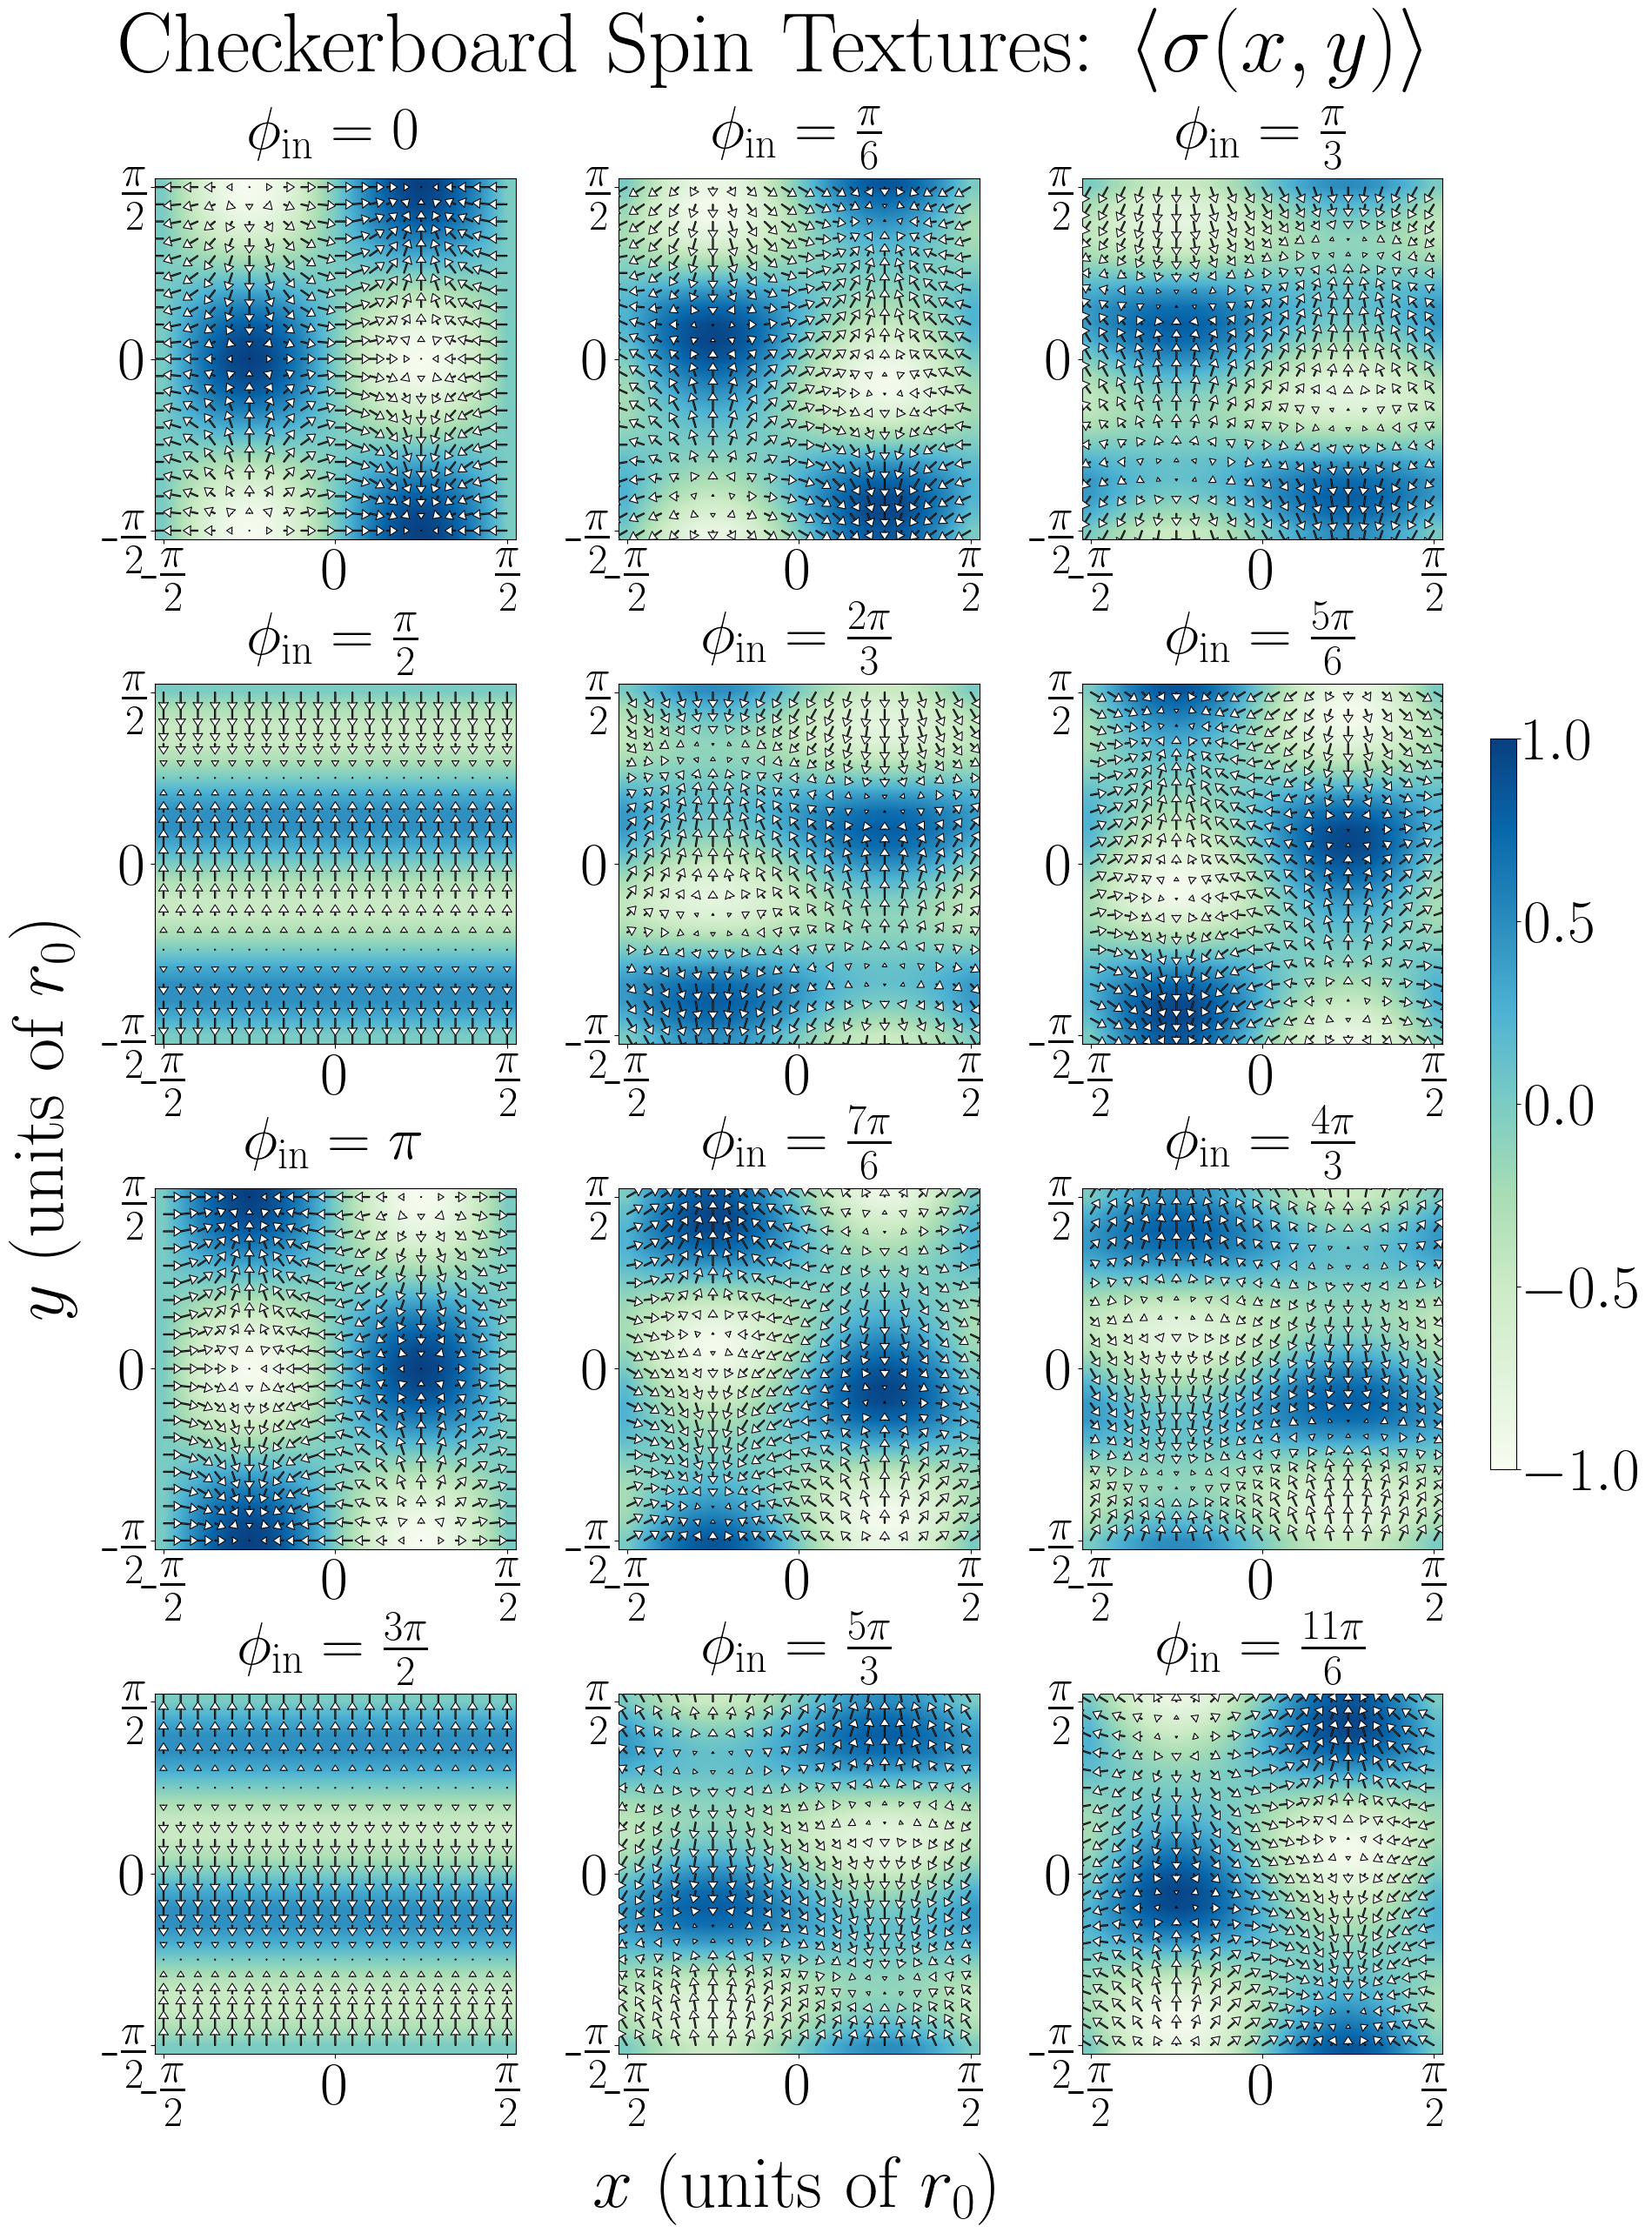

In [37]:
limit = np.pi/2
points = 21

axis = [round(i,1) for i in np.linspace(-limit,limit,points)]

X,Y = np.meshgrid(np.linspace(-limit,limit,points), np.linspace(-limit,limit,points))
QX, QY = np.meshgrid(np.arange(points), np.arange(points))

vertplots, horzplots = [4,3]

phis = ['$0$', r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$', r'$\frac{\pi}{2}$', r'$\frac{2\pi}{3}$', r'$\frac{5\pi}{6}$', \
        r'$\pi$', r'$\frac{7\pi}{6}$', r'$\frac{4\pi}{3}$', r'$\frac{3\pi}{2}$', r'$\frac{5\pi}{3}$', r'$\frac{11\pi}{6}$']

phis_n = np.linspace(0,11*np.pi/6,12)

fig, axes = plt.subplots(vertplots, horzplots, figsize=(20,28))

for i in range(horzplots):
    for j in range (vertplots):
        axes[j][i].set_title(r'$\phi_{\mathrm{in}}=$ ' + phis[i + horzplots*j], pad=25)

        phi = phis_n[i + horzplots*j]
        theta = np.pi/2

        polx = np.cos(theta)*np.sin(2*X) + np.cos(2*X)*np.cos(phi)*np.sin(theta)
        poly = -np.cos(2*X)*np.cos(theta)*np.sin(2*Y) + np.sin(theta)*(np.cos(phi)*np.sin(2*X)*np.sin(2*Y) + np.cos(2*Y)*np.sin(phi))
        polz = np.cos(2*Y)*(np.cos(2*X)*np.cos(theta) - 2*np.cos(X)*np.cos(phi)*np.sin(X)*np.sin(theta) + np.sin(2*Y)*np.sin(theta)*np.sin(phi))

        axes[j][i].quiver(QX,QY,polx,poly, scale=20, scale_units='width', color='white', pivot='tail', width=3e-3, \
                          headwidth=9, headlength=7, headaxislength=6.5, ls='solid', linewidth=.75, edgecolor='black', zorder=10)

        im = axes[j][i].imshow(polz, cmap='GnBu', vmin=-1, vmax=1, interpolation='bilinear', origin='lower', zorder=0)

        axes[j][i].set_xticks(np.linspace(0,points-1,3))
        axes[j][i].set_yticks(np.linspace(0,points-1,3))
        axes[j][i].set_xticklabels([r'-$\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$'])
        axes[j][i].set_yticklabels([r'-$\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$'])
        
fig.suptitle(r'Checkerboard Spin Textures: $\langle \sigma(x,y) \rangle$', y=.95)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
cbar_ax = fig.add_axes([0.91, 0.35, 0.015, 0.3])   #left, bottom, width, height
fig.colorbar(im, cax=cbar_ax, aspect=1)
fig.add_subplot(111, frameon=False)    #adds big bounding plot space
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('$x$ (units of $r_0$)', labelpad=30)
plt.ylabel('$y$ (units of $r_0$)', labelpad=-30)
plt.show()

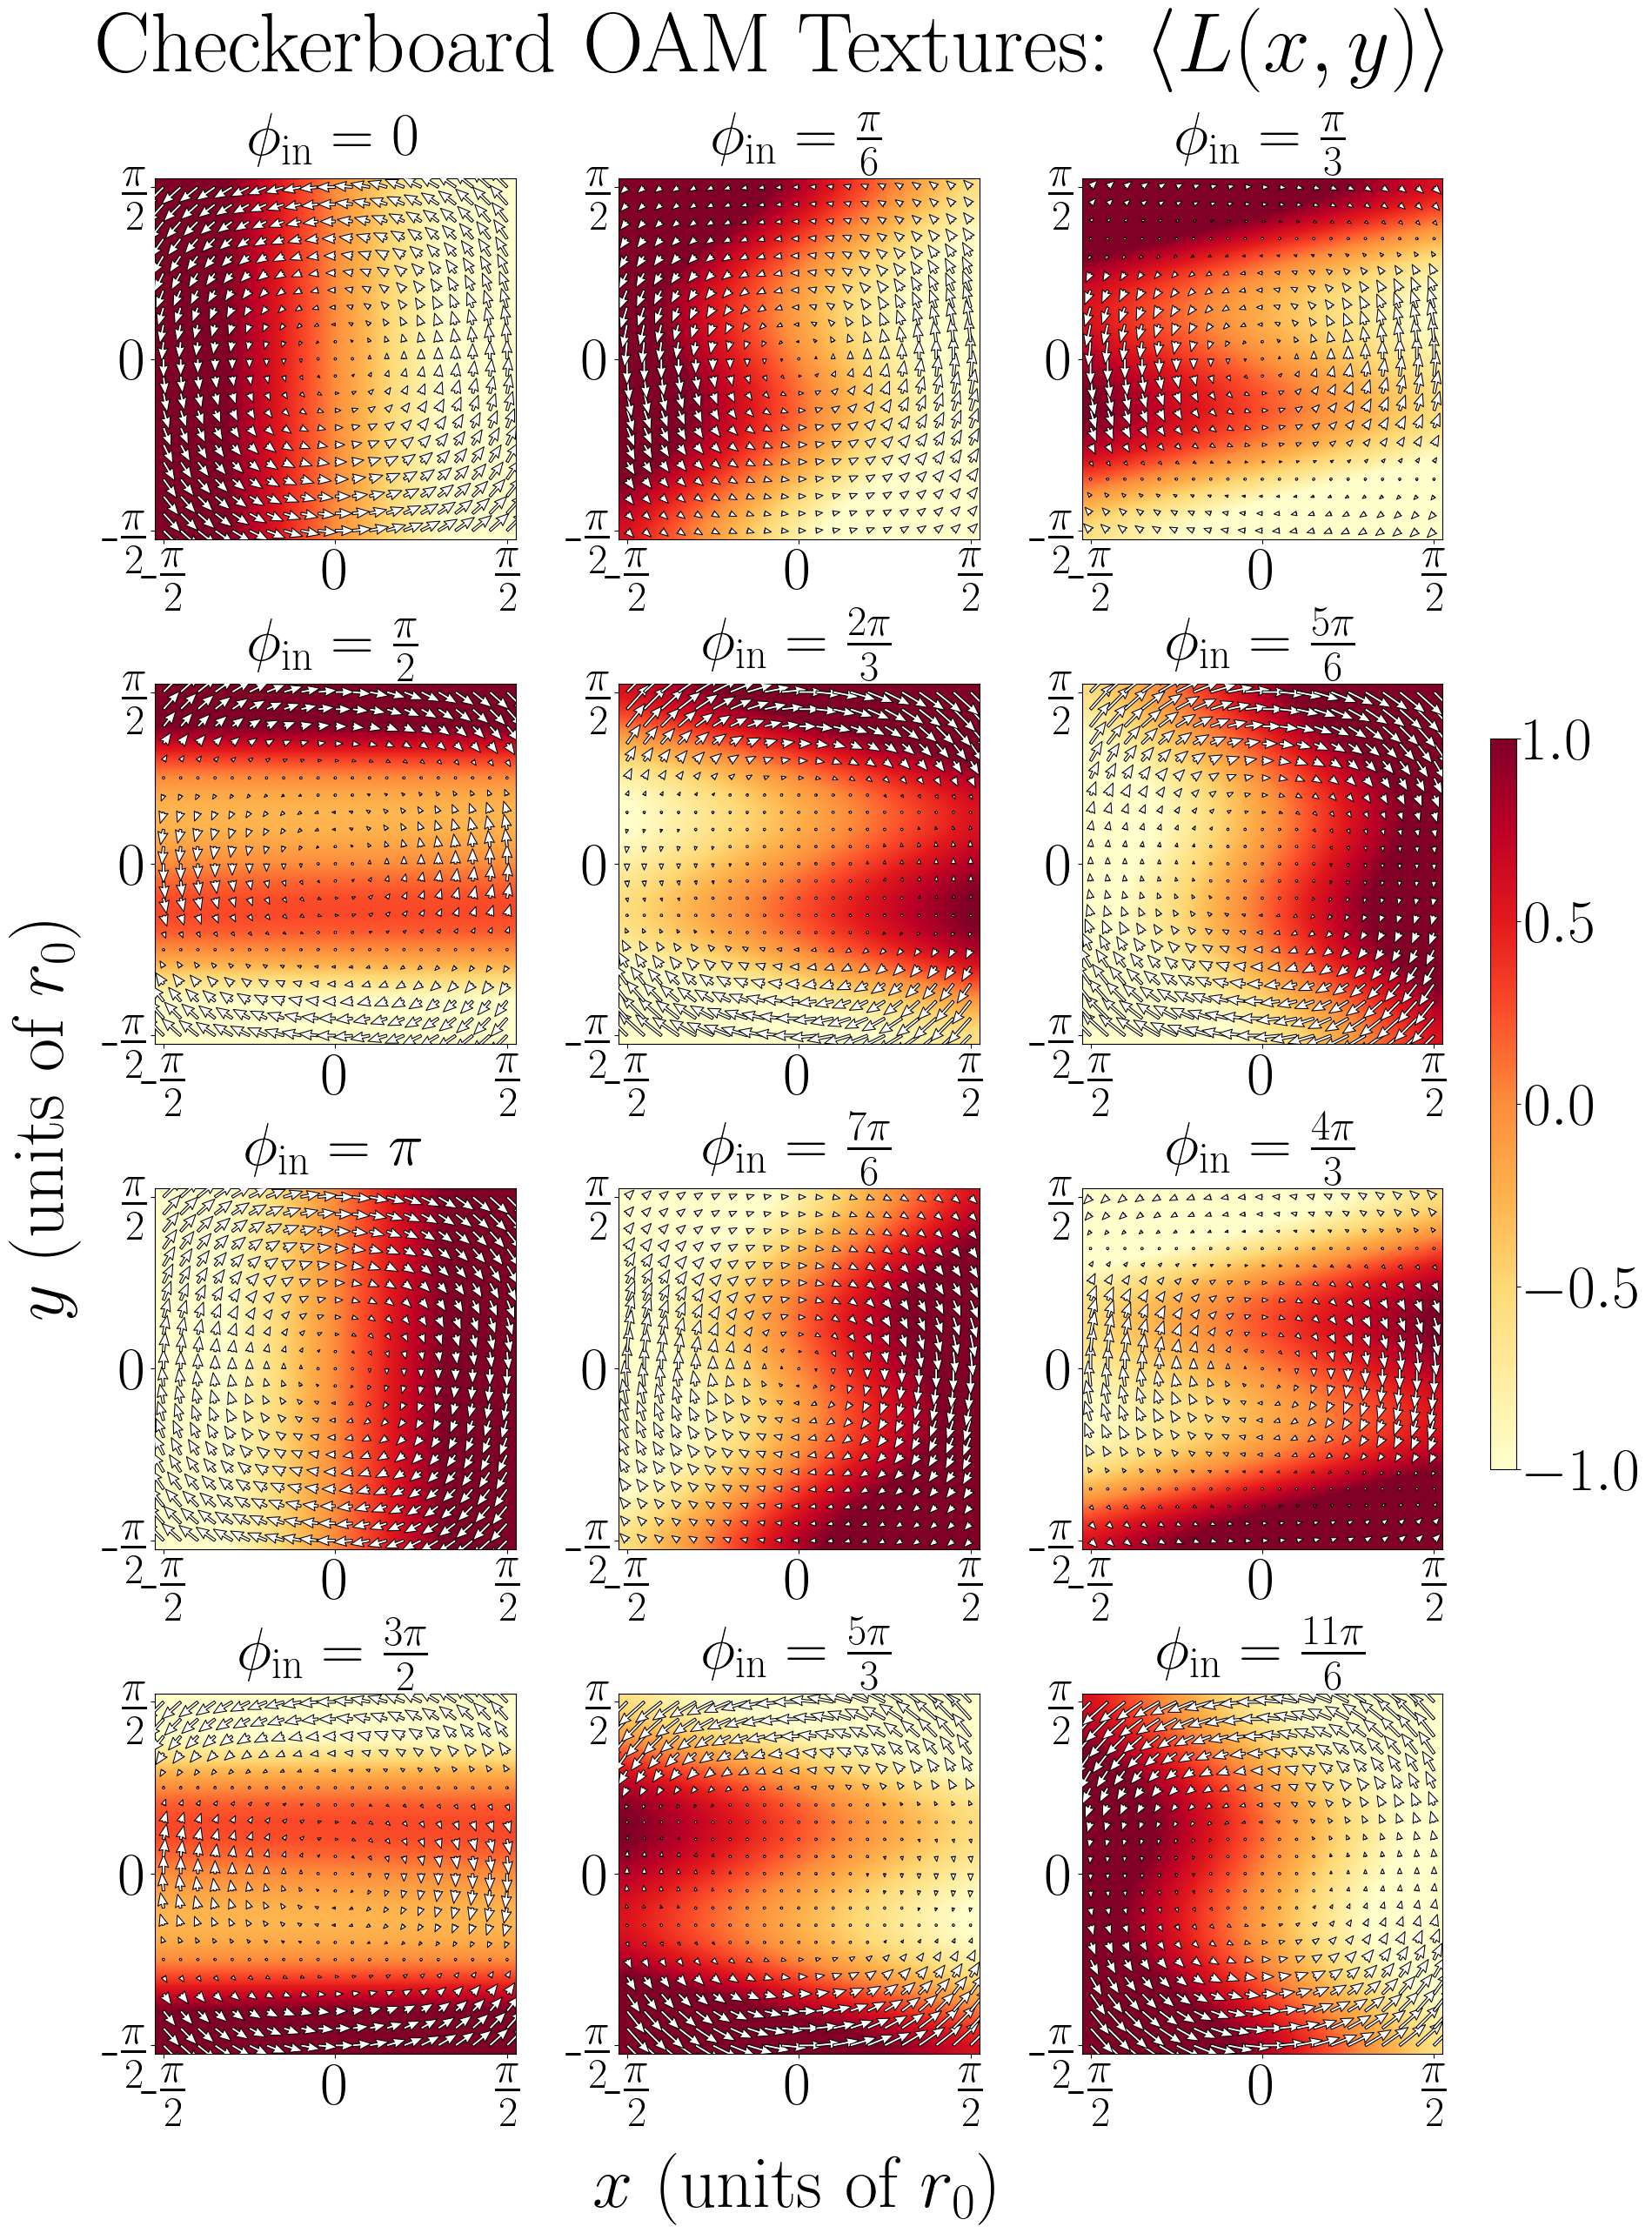

In [40]:
limit = np.pi/2
points = 21
axis = [round(i,1) for i in np.linspace(-limit,limit,points)]

X,Y = np.meshgrid(np.linspace(-limit,limit,points), np.linspace(-limit,limit,points))
QX, QY = np.meshgrid(np.arange(points), np.arange(points))

vertplots, horzplots = [4,3]

phis = ['$0$', r'$\frac{\pi}{6}$', r'$\frac{\pi}{3}$', r'$\frac{\pi}{2}$', r'$\frac{2\pi}{3}$', r'$\frac{5\pi}{6}$', \
        r'$\pi$', r'$\frac{7\pi}{6}$', r'$\frac{4\pi}{3}$', r'$\frac{3\pi}{2}$', r'$\frac{5\pi}{3}$', r'$\frac{11\pi}{6}$']

phis_n = np.linspace(0,11*np.pi/6,12)

fig, axes = plt.subplots(vertplots, horzplots, figsize=(20,28))

for i in range(horzplots):
    for j in range (vertplots):
        axes[j][i].set_title(r'$\phi_{\mathrm{in}}=$ ' + phis[i + horzplots*j], pad=20)
        
        phi = phis_n[i + horzplots*j]
        theta = np.pi/2

        k = 1
        Lx = 1/2*k*Y*(np.cos(theta)*np.sin(2*k*Y) - np.sin(theta)*(np.cos(phi) + np.cos(2*k*Y)*np.sin(phi)))
        Ly = 1/2*k*X*(-np.cos(theta)*np.sin(2*k*Y) + np.sin(theta)*(np.cos(phi) + np.cos(2*k*Y)*np.sin(phi)))
        Lz = k*(Y*np.cos(theta)*np.sin(2*k*Y) - np.sin(theta)*(X*np.cos(phi) + Y*np.cos(2*k*Y)*np.sin(phi)))
        
        axes[j][i].quiver(QX,QY,Lx,Ly, scale=15, scale_units='width', color='white', pivot='tail', width=7e-3, headwidth=4, \
                          ls='solid', linewidth=.75, edgecolor='black', zorder=10)

        im = axes[j][i].imshow(Lz, cmap='YlOrRd', interpolation='bilinear', origin='lower', zorder=0, vmin=-1, vmax=1)

        axes[j][i].set_xticks(np.linspace(0,points-1,3))
        axes[j][i].set_yticks(np.linspace(0,points-1,3))
        axes[j][i].set_xticklabels([r'-$\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$'])
        axes[j][i].set_yticklabels([r'-$\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$'])
        
fig.suptitle(r'Checkerboard OAM Textures: $\langle L(x,y) \rangle$', y=.95)
plt.subplots_adjust(wspace=0.1, hspace=0.4)
cbar_ax = fig.add_axes([0.91, 0.35, 0.015, 0.3])   #left, bottom, width, height
fig.colorbar(im, cax=cbar_ax, aspect=1)
fig.add_subplot(111, frameon=False)    #adds big bounding plot space
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.grid(False)
plt.xlabel('$x$ (units of $r_0$)', labelpad=30)
plt.ylabel('$y$ (units of $r_0$)', labelpad=-30)
plt.show()

# Animation Cells

In [50]:
#Checkerboard spin texture:
def sp_ch_ani(frame, theta, arrows):
    phi = 2*np.pi*frame/F_tot
    
    polx = -np.cos(theta)*np.sin(2*X) + np.cos(2*X)*np.cos(phi)*np.sin(theta)
    poly = np.cos(2*X)*np.cos(theta)*np.sin(2*Y) + np.sin(theta)*(np.cos(phi)*np.sin(2*X)*np.sin(2*Y) \
                                                                   + np.cos(2*Y)*np.sin(phi))
    polz = np.cos(2*Y)*(np.cos(2*X)*np.cos(theta) + 2*np.cos(X)*np.cos(phi)*np.sin(X)*np.sin(theta) \
                        - np.sin(2*Y)*np.sin(theta)*np.sin(phi))
    
    plt.title(r'Spin Texture: $\phi_{\mathrm{in}} = ' \
              + f"{phi/np.pi:.2f}" + r'\pi, \, \theta_{\mathrm{in}} = ' + str(round(theta/np.pi,2)) + r' \pi$', pad=15)
    
    if arrows:
        quiver.set_UVC(polx,poly)
    image.set_data(polz)

limit = np.pi/2
points = 25
X,Y = np.meshgrid(np.linspace(-limit,limit,points), np.linspace(-limit,limit,points))
QX, QY = np.meshgrid(np.arange(points), np.arange(points))

fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_xticks(np.linspace(0,points-1,5))
ax.set_yticks(np.linspace(0,points-1,5))
ax.set_xticklabels([r'-$\frac{\pi}{2}$', r'-$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
ax.set_yticklabels([r'-$\frac{\pi}{2}$', r'-$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
plt.xlabel('$x$ (units of $r_0$)')
plt.ylabel('$y$ (units of $r_0$)')

state = plt.text(.5, 23, r'$\ket{\psi_{\mathrm{in}}} = \cos (\theta_{\mathrm{in}}/2) \ket{\uparrow} ' + \
                 r'+ e^{i \phi_{\mathrm{in}}} \sin (\theta_{\mathrm{in}}/2) \ket{\downarrow}$', \
                 fontdict=dict(fontsize=25), bbox=dict(facecolor='white', alpha=.75, edgecolor='black', boxstyle='round,pad=.25'))
state.set_zorder(35)
ax.add_artist(state)

rval = plt.text(15,.5, r'$\num{100} \unit{\micro \meter} \lesssim r_0 \lesssim \num{10} \unit{\centi \meter}$', \
                fontdict=dict(fontsize=30), bbox=dict(facecolor='white', alpha=.75, edgecolor='black', boxstyle='round,pad=.25'))
rval.set_zorder(30)
ax.add_artist(rval)

quiver = plt.quiver(QX, QY, X, Y, scale=25, scale_units='width', color='white', pivot='tail',\
                    width=3e-3, headwidth=5, ls='solid', linewidth=1.25, edgecolor='black', zorder=10)
image = plt.imshow(X + Y, cmap='bwr', vmin=-1, vmax=1, interpolation='bilinear', origin='lower', zorder=0)
plt.colorbar(fraction=0.035)

F_tot = 240
F_int = 200
FPS = 24
anim = FuncAnimation(fig, sp_ch_ani, fargs=(np.pi/2,True), frames=F_tot, interval=F_int, repeat=True)
anim.save('ch_sp_FPS'+str(FPS)+'_frames'+str(F_tot)+'.gif', writer='pillow', fps=FPS)
plt.close()
print('Ding!')

Ding!


In [59]:
#Donut spin texture:
def do_sp_ani(frame, theta, arrows):
    phi = 2*np.pi*frame/F_tot

    polx = np.cos(Y)**2*np.cos(theta)*np.sin(-4*X) + (1/4)*(2 + 2*np.cos(4*X) - 2*np.cos(2*Y) + \
    np.cos(2*(2*X + Y)) + np.cos(4*X - 2*Y))*np.cos(phi)*np.sin(theta) + \
    np.sin(-2*X)*np.sin(-2*Y)*np.sin(theta)*np.sin(phi)

    poly = (-np.cos(X)**2)*(-2 + 2*np.cos(2*X) + np.cos(2*(X - Y)) + np.cos(2*(X + Y)))*np.cos(theta)* \
    np.sin(-2*Y) + (1/4)*np.sin(theta)*(np.cos(phi)*np.sin(-2*Y)*(2*np.sin(-4*X) + 2*np.sin(-2*(X - Y)) + \
    2*np.sin(-2*(X + Y)) + np.sin(-2*(2*X + Y)) + np.sin(-4*X - 2*Y)) + \
    (2 - 2*np.cos(2*X) + np.cos(2*(X - 2*Y)) + 2*np.cos(4*Y) + np.cos(2*(X + 2*Y)))* \
    np.sin(phi))
    
    polz = (1/8)*(-4*np.cos(2*X) + 2*np.cos(4*X) + 2*np.cos(2*(X - 2*Y)) + np.cos(4*(X - Y)) - \
    4*np.cos(2*Y) + 2*np.cos(4*Y) + np.cos(4*(X + Y)) + \
    2*(1 + np.cos(2*(2*X + Y)) + np.cos(2*(X + 2*Y)) + np.cos(4*X - 2*Y)))*np.cos(theta) - \
    1/8*np.cos(phi)*(-4*np.sin(-2*X) + 2*np.sin(-4*X) + 2*np.sin(-2*(X - 2*Y)) + \
    np.sin(-4*(X - Y)) + np.sin(-4*(X + Y)) + 2*(np.sin(-2*(2*X + Y)) + np.sin(-2*(X + 2*Y)) + \
    np.sin(-4*X + 2*Y)))*np.sin(theta) + np.cos(X)**2*np.sin(-4*Y)*np.sin(theta)*np.sin(phi)
    
    plt.title(r'Spin Texture: $\phi_{\mathrm{in}} = ' \
              + f"{phi/np.pi:.2f}" + r'\pi, \, \theta_{\mathrm{in}} = ' + str(round(theta/np.pi,2)) + r' \pi$', pad=15)
    
    if arrows:
        quiver.set_UVC(polx,poly)
    image.set_data(polz)

limit = np.pi/2
points = 25
X,Y = np.meshgrid(np.linspace(-limit,limit,points), np.linspace(-limit,limit,points))
QX, QY = np.meshgrid(np.arange(points), np.arange(points))

fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_xticks(np.linspace(0,points-1,5))
ax.set_yticks(np.linspace(0,points-1,5))
ax.set_xticklabels([r'-$\frac{\pi}{2}$', r'-$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
ax.set_yticklabels([r'-$\frac{\pi}{2}$', r'-$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
plt.xlabel('$x$ (units of $r_0$)')
plt.ylabel('$y$ (units of $r_0$)')

state = plt.text(.5, 23, r'$\ket{\psi_{\mathrm{in}}} = \cos (\theta_{\mathrm{in}}/2) \ket{\uparrow} ' + \
                 r'+ e^{i \phi_{\mathrm{in}}} \sin (\theta_{\mathrm{in}}/2) \ket{\downarrow}$', \
                 fontdict=dict(fontsize=25), bbox=dict(facecolor='white', alpha=.8, edgecolor='black', boxstyle='round,pad=.25'))
state.set_zorder(35)
ax.add_artist(state)

rval = plt.text(15,.5, r'$\num{100} \unit{\micro \meter} \lesssim r_0 \lesssim \num{10} \unit{\centi \meter}$', \
                fontdict=dict(fontsize=30), bbox=dict(facecolor='white', alpha=.8, edgecolor='black', boxstyle='round,pad=.25'))
rval.set_zorder(30)
ax.add_artist(rval)

quiver = plt.quiver(QX, QY, X, Y, scale=25, scale_units='width', color='white', pivot='tail',\
                    width=3e-3, headwidth=5, ls='solid', linewidth=1.25, edgecolor='black', zorder=10)
image = plt.imshow(X + Y, cmap='plasma', vmin=-1, vmax=1, interpolation='bilinear', origin='lower', zorder=0)
plt.colorbar(fraction=0.035)

F_tot = 240
F_int = 200
FPS = 24
anim = FuncAnimation(fig, do_sp_ani, fargs=(np.pi/2,True), frames=F_tot, interval=F_int, repeat=True)
anim.save('do_sp_FPS'+str(FPS)+'_frames'+str(F_tot)+'.gif', writer='pillow', fps=FPS)
plt.close()
print('Ding!')

Ding!


In [111]:
#Checkerboard OAM:
def ch_l_ani(frame, theta_in, arrows):
    theta = theta_in
    phi = 2*np.pi*frame/F_tot

    Lx = -1/2*k*Y*(np.cos(theta)*np.sin(-2*k*Y) - np.sin(theta)*(np.cos(phi) + np.cos(2*k*Y)*np.sin(phi)))
    Ly = -1/2*k*X*(-np.cos(theta)*np.sin(-2*k*Y) + np.sin(theta)*(np.cos(phi) + np.cos(2*k*Y)*np.sin(phi)))
    Lz = k*(Y*np.cos(theta)*np.sin(-2*k*Y) - np.sin(theta)*(X*np.cos(phi) + Y*np.cos(2*k*Y)*np.sin(phi)))
    
    plt.title(r'OAM Density: $\phi_{\mathrm{in}} = ' \
              + f"{phi/np.pi:.2f}" + r'\pi, \, \theta_{\mathrm{in}} = ' + str(round(theta/np.pi,2)) + r' \pi$', pad=15)
    
    if arrows:
        quiver.set_UVC(Lx,Ly)
    image.set_data(Lz)

limit = np.pi/4
points = 25
X,Y = np.meshgrid(np.linspace(-limit,limit,points), np.linspace(-limit,limit,points))
QX, QY = np.meshgrid(np.arange(points), np.arange(points))

fig = plt.figure(figsize=(14,14))
ax = plt.axes()
ax.set_xticks(np.linspace(0,points-1,5))
ax.set_yticks(np.linspace(0,points-1,5))
ax.set_xticklabels([r'-$\frac{\pi}{2}$', r'-$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
ax.set_yticklabels([r'-$\frac{\pi}{2}$', r'-$\frac{\pi}{4}$', r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$'])
plt.xlabel('$x$ (units of $r_0$)')
plt.ylabel('$y$ (units of $r_0$)')

state = plt.text(.5, 23, r'$\ket{\psi_{\mathrm{in}}} = \cos (\theta_{\mathrm{in}}/2) \ket{\uparrow} ' + \
                 r'+ e^{i \phi_{\mathrm{in}}} \sin (\theta_{\mathrm{in}}/2) \ket{\downarrow}$', \
                 fontdict=dict(fontsize=25), bbox=dict(facecolor='white', alpha=.775, edgecolor='black', boxstyle='round,pad=.25'))
state.set_zorder(35)
ax.add_artist(state)

rval = plt.text(15,.5, r'$\num{100} \unit{\micro \meter} \lesssim r_0 \lesssim \num{10} \unit{\centi \meter}$', \
                fontdict=dict(fontsize=30), bbox=dict(facecolor='white', alpha=.775, edgecolor='black', boxstyle='round,pad=.25'))
rval.set_zorder(30)
ax.add_artist(rval)

quiver = plt.quiver(QX, QY, X, Y, scale=10, scale_units='width', color='white', pivot='tail',\
                    width=3e-3, headwidth=5, ls='solid', linewidth=1.25, edgecolor='black', zorder=10)
image = plt.imshow(X + Y, cmap='bwr', vmin=-1, vmax=1, interpolation='bilinear', origin='lower', zorder=0)
plt.colorbar(fraction=0.035)

F_tot = 100
F_int = 200
FPS = 10
anim = FuncAnimation(fig, ch_l_ani, fargs=(np.pi/2,True), frames=F_tot, interval=F_int, repeat=True)
anim.save('ch_l_FPS'+str(FPS)+'_frames'+str(F_tot)+'.gif', writer='pillow', fps=FPS)
plt.close()
print('Ding!')

Ding!


# Azimuthal Probability Current Plot

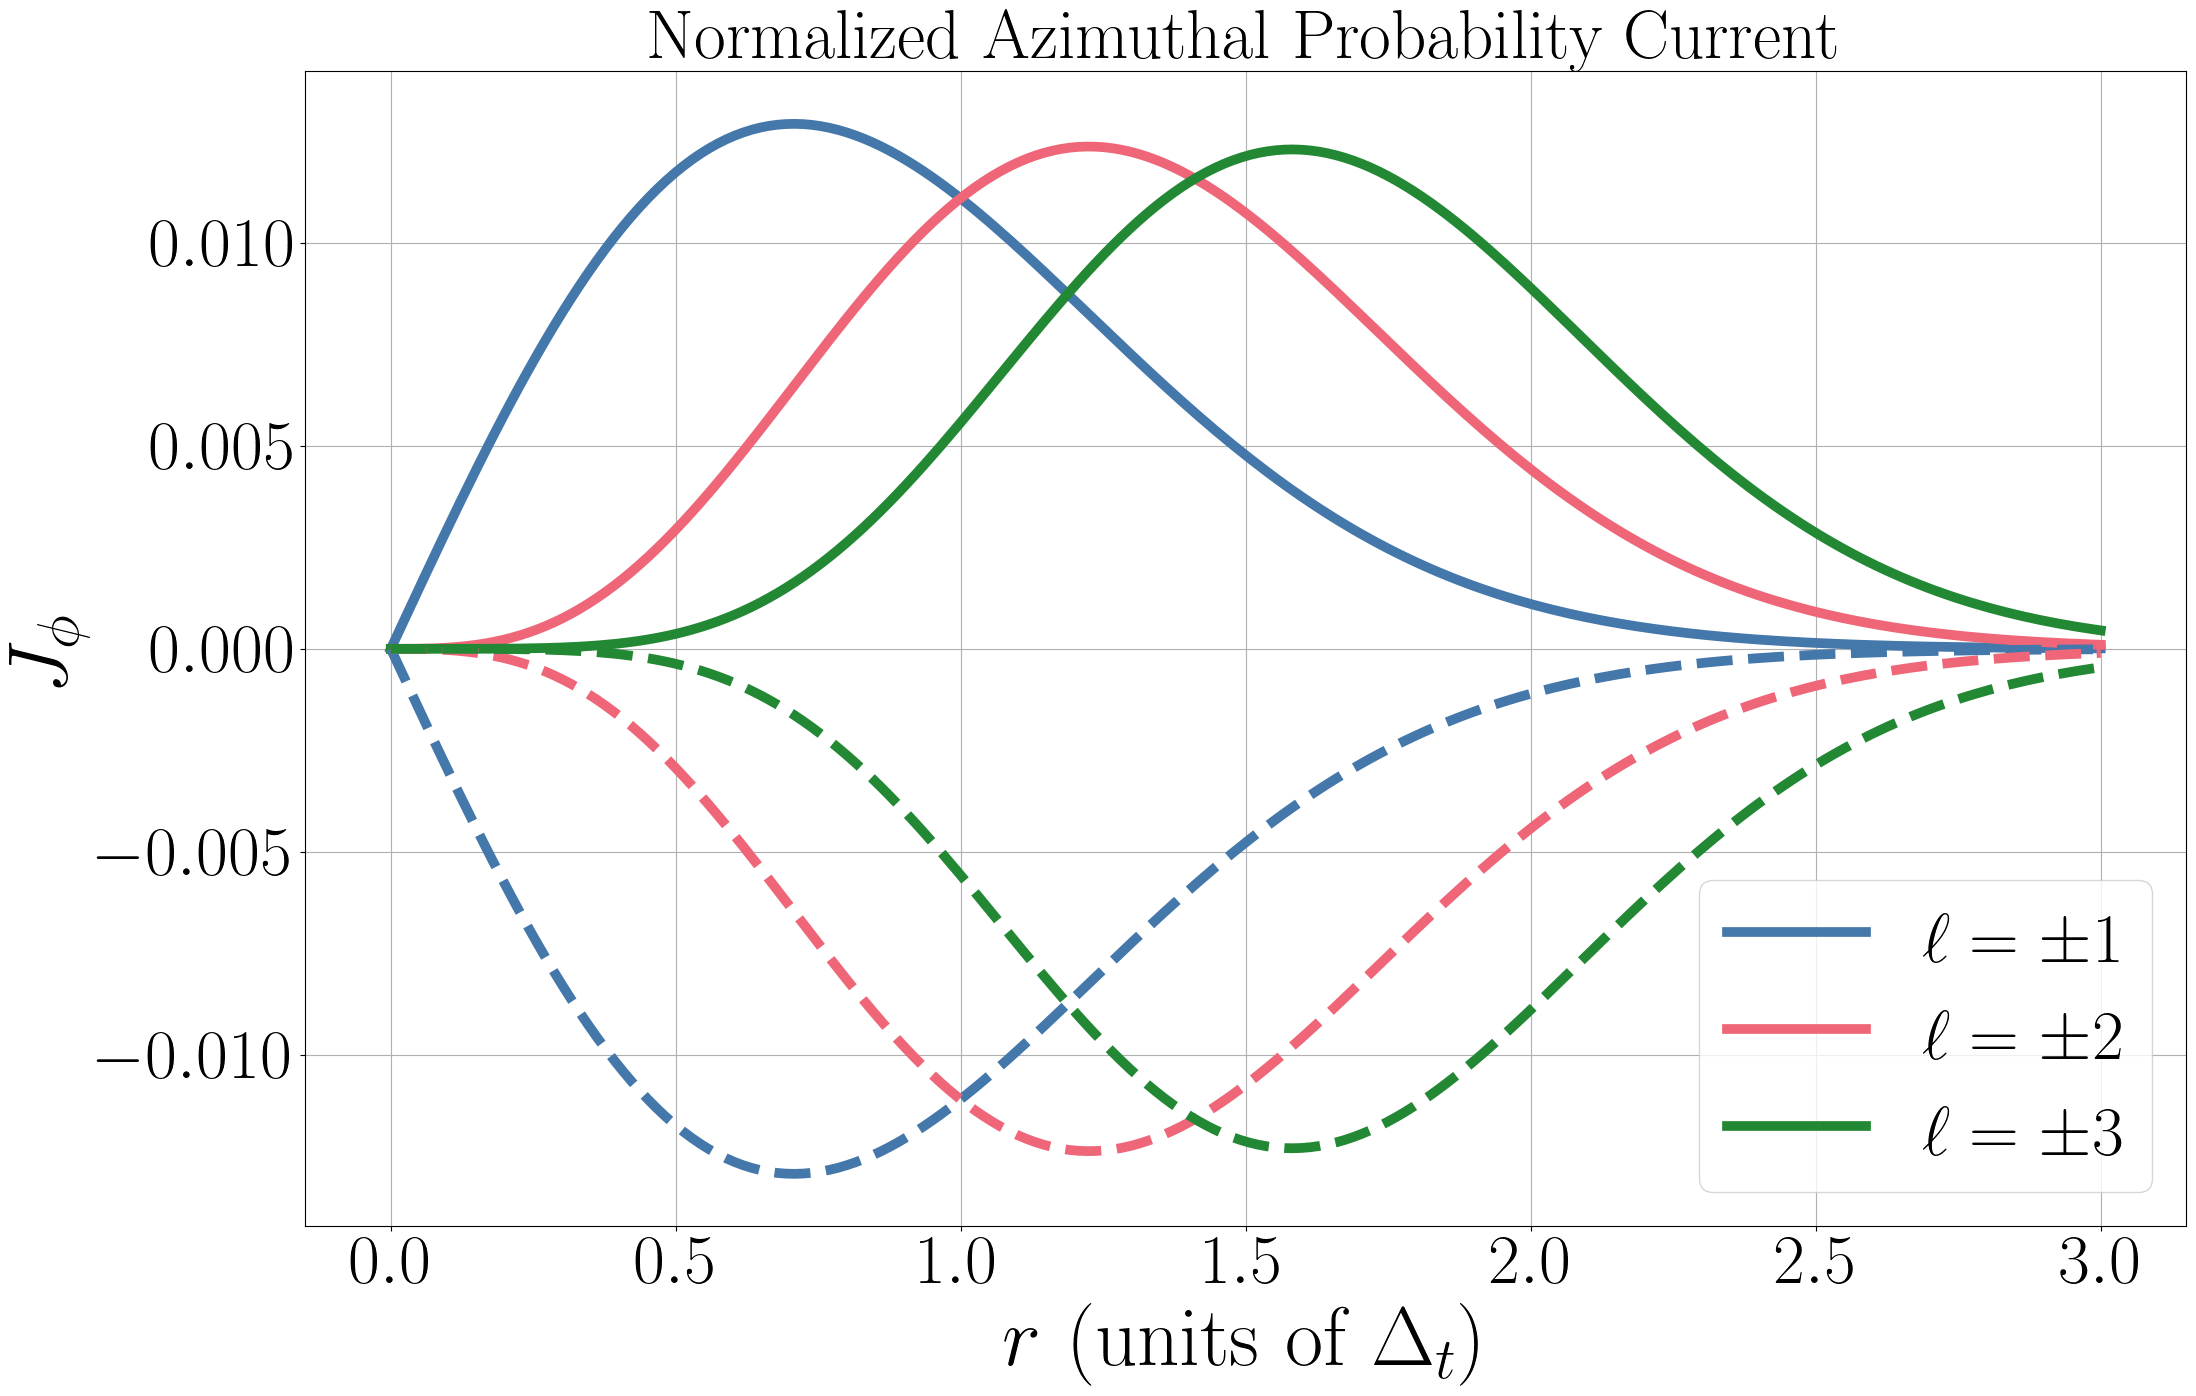

In [110]:
rpos = np.linspace(0,3,200)

def glm(l,r):
    result = l*np.exp(-r**2)*r**(2*abs(l)-1)
    return result/np.sum(np.abs(result))

fig = plt.figure(figsize=(plot_width,plot_height))
ax = plt.axes()
for i,l in enumerate([1,2,3,-1,-2,-3]):
    if l>0:
        plt.plot(rpos, glm(l,rpos), '-', color='C'+str(i), linewidth=7, label='$\ell=\pm'+str(l)+'$')
    else:
        plt.plot(rpos, glm(l,rpos), '--', color='C'+str(i-3), linewidth=7)
plt.title('Normalized Azimuthal Probability Current')
plt.xlabel('$r$ (units of $\Delta_t$)')
plt.ylabel('$J_{\phi}$')
plt.legend(loc='lower right')
plt.grid()
plt.show()